# Introduction

Student academic performance is influenced by a variety of factors, including study habits, behavioral characteristics, and personal background.
Understanding these factors is important for improving educational outcomes and designing effective interventions.

The objectives of this project are as follows:
1. To compare the predictive performance of multiple machine learning models.
2. To analyze feature importance in order to better understand which student-related factors are most strongly associated with exam performance.

### Group Members: Yu Chen(487136) and Mitu Mevada(481382)


#  Data Description

The dataset used in this project is obtained from Kaggle: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/data

The dataset contains variables related to students' demographic background, study habits, and behavioral characteristics.
The target variable is the exam score, which represents students' academic performance.

Categorical variables are encoded using dummy variables, and numerical variables are standardized during preprocessing.


## 1. Data Loading

In [22]:
import pandas as pd

data = pd.read_csv("StudentPerformanceFactors.csv")
data.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## 2. Exploratory Data Analysis

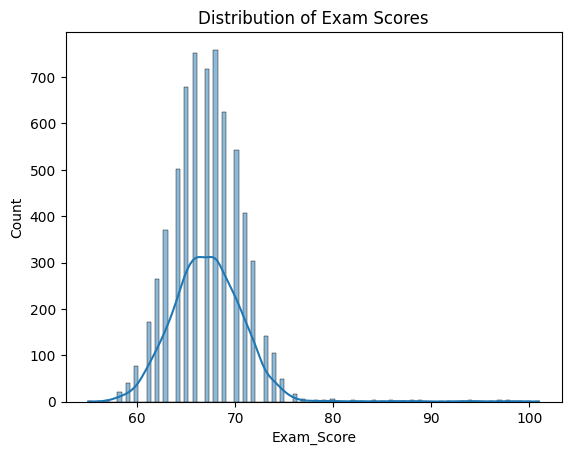

In [24]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data["Exam_Score"], kde=True)
plt.title("Distribution of Exam Scores")
plt.show()


Firstly, the distribution of students’ exam scores (Exam_Score) was examined using a histogram combined with a kernel density estimation (KDE) curve.The exam scores follow an approximately normal distribution, with most scores concentrated between 60 and 75, indicating a moderately difficult and well-balanced exam.

After examining the overall distribution of exam scores, the relationships between several student-related factors and exam performance are further explored to gain initial insights into potential predictors of academic outcomes.

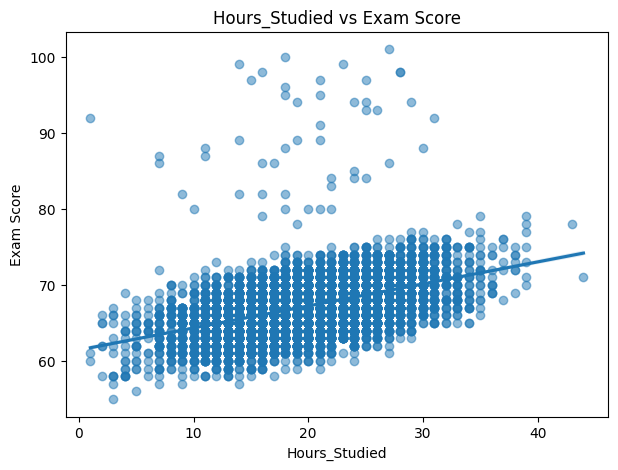

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.regplot(
    x="Hours_Studied",
    y="Exam_Score",
    data=data,
    scatter_kws={"alpha":0.5}
)
plt.title("Hours_Studied vs Exam Score")
plt.xlabel("Hours_Studied")
plt.ylabel("Exam Score")
plt.show()


The scatter plot indicates a positive relationship between study hours and exam scores, suggesting that increased study time is associated with better academic performance.

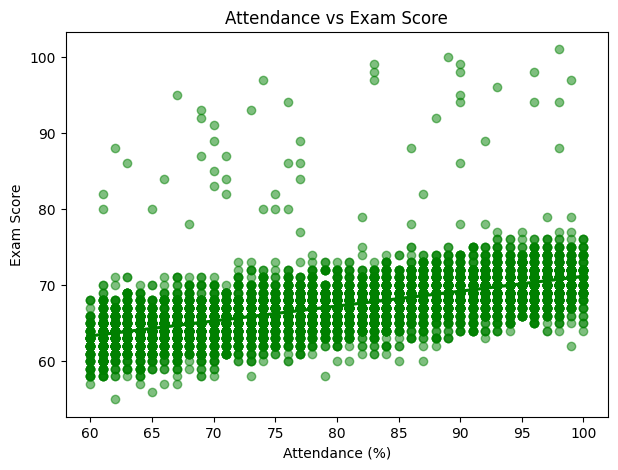

In [27]:
plt.figure(figsize=(7,5))
sns.regplot(
    x="Attendance",
    y="Exam_Score",
    data=data,
    scatter_kws={"alpha":0.5},
    color="green"
)
plt.title("Attendance vs Exam Score")
plt.xlabel("Attendance (%)")
plt.ylabel("Exam Score")
plt.show()


The scatter plot reveals a positive relationship between attendance and exam scores, indicating that students with higher attendance tend to achieve better academic performance. Although individual variation exists, higher attendance is generally associated with more stable and higher exam scores.

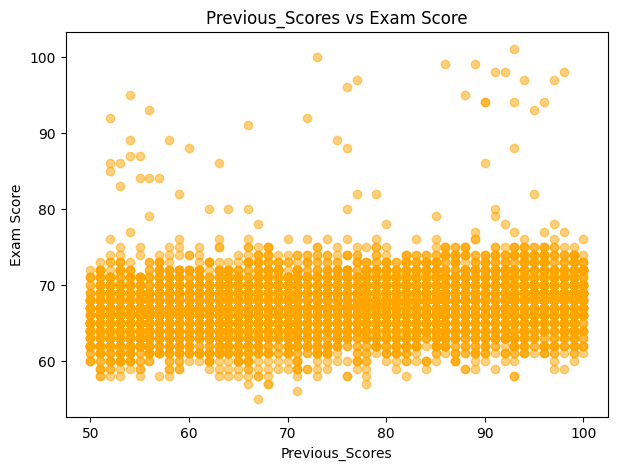

In [28]:
plt.figure(figsize=(7,5))
sns.regplot(
    x="Previous_Scores",
    y="Exam_Score",
    data=data,
    scatter_kws={"alpha":0.5},
    color="orange"
)
plt.title("Previous_Scores vs Exam Score")
plt.xlabel("Previous_Scores")
plt.ylabel("Exam Score")
plt.show()


The scatter plot suggests a positive relationship between previous academic scores and current exam performance. Students with higher previous scores are more likely to achieve higher exam results, although substantial variability remains, indicating that prior performance alone does not fully determine current outcomes.

While exploratory analysis focuses on a subset of representative features for interpretability, all available features are included in the machine learning models to avoid manual feature selection bias.

We will now quantify these correlations so that we can see how strong they are actually correlated.

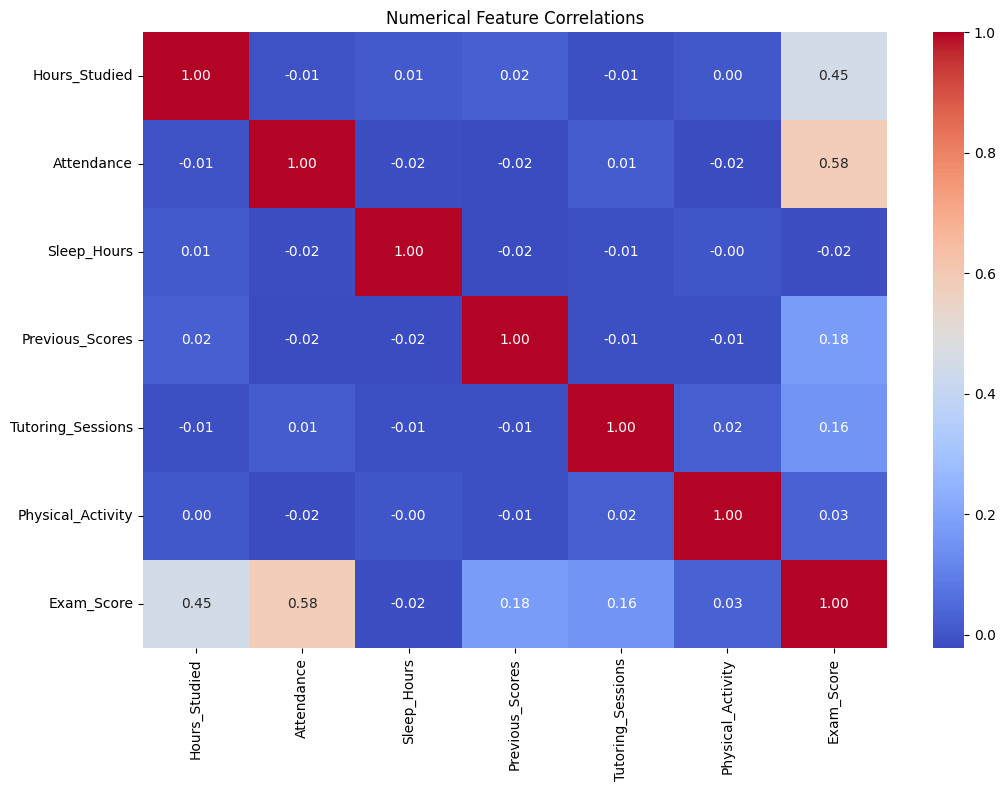

In [29]:
# Correlation Heatmap (Numeric only)
plt.figure(figsize=(12, 8))
numeric_df = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Numerical Feature Correlations')
plt.show()

This correlation heatmap reports pairwise correlations among numerical features.The purpose is to examine potential multicollinearity between predictors before fitting linear regression models.

The results indicate that correlations among explanatory variables are generally low, suggesting that multicollinearity is not a major concern in this dataset.This supports the stability of the linear regression estimates.


## Methodology

### Data Splitting
The dataset is first split into a training set (80%) and a test set (20%).
The training set is used for model fitting and model selection, while the test set is strictly held out for final out-of-sample evaluation.

### Model Training
All models are trained exclusively on the training set.
Baseline models are first estimated to establish benchmark performance.

### Cross-Validation
To obtain robust performance estimates and reduce overfitting, K-fold cross-validation is applied within the training set.
Cross-validation is used only for model selection and hyperparameter tuning.

### Hyperparameter Tuning
Hyperparameters are optimized using GridSearchCV or RandomizedSearchCV, combined with cross-validation.
This ensures that model tuning does not introduce data leakage.

### Model Evaluation
After model training and tuning, the final models are evaluated on the independent test set.
Performance is measured using RMSE and R², comparing predicted values with true exam scores.

This workflow follows best practices in supervised machine learning and aligns with the bias–variance trade-off discussed in the course.


Having defined the overall modeling workflow and evaluation strategy, the next step involves data preprocessing to ensure that model training adheres to the experimental design and avoids data leakage.

## 3. Data Preprocessing

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop("Exam_Score", axis=1)
y = data["Exam_Score"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Data preprocessing involves separating the target variable from input features, encoding categorical variables using one-hot encoding, splitting the data into training and test sets, and standardizing numerical features. Importantly, feature scaling is performed using statistics derived solely from the training set to prevent data leakage.

While feature scaling is not strictly required for tree-based models, it is applied consistently across all models to ensure fair comparison.

## 4. Model 1: Linear Regression (Baseline)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

rmse_lr = np.sqrt(mean_squared_error(y_test,y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

rmse_lr, r2_lr


(np.float64(1.8046317813990214), 0.7696017567194432)

A linear regression model is trained as a baseline. The model achieves an RMSE of approximately 1.80 and an R² of 0.77 on the test set, indicating that linear relationships already capture a substantial portion of the variance in exam scores.

## 5. Model 2: Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test,y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf, r2_rf


(np.float64(2.226401150728164), 0.649321777910057)

Interestingly, the Random Forest model does not outperform the linear regression baseline. This suggests that the relationship between student-related features and exam scores is largely linear, and that increased model complexity does not necessarily lead to better generalization performance.

## 6. Model 3: Support Vector Regression (SVR)

In [36]:
from sklearn.svm import SVR
import numpy as np

svr = SVR(kernel="rbf", C=100, gamma=0.1)
svr.fit(X_train_scaled, y_train)

y_pred_svr = svr.predict(X_test_scaled)

rmse_svr = np.sqrt(mean_squared_error(y_test,y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

rmse_svr, r2_svr

(np.float64(2.2028529203959994), 0.6567006643830713)

The Support Vector Regression model with an RBF kernel achieves moderate predictive performance, with an RMSE of approximately 2.20 and an R² of 0.66. Although SVR is capable of modeling non-linear relationships, it does not outperform the linear regression baseline in this dataset, suggesting that the underlying relationship between features and exam scores is largely linear.

Beyond single train–test evaluation, cross-validation and hyperparameter tuning are applied to improve robustness and generalization, and a Gradient Boosting Regressor is further evaluated as a boosting-based extension.

## 7. Cross-Validation

In [37]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_rmse_lr = -cross_val_score(
    lr,
    X_train_scaled,
    y_train,
    scoring="neg_root_mean_squared_error",
    cv=kf
)

cv_rmse_lr.mean(), cv_rmse_lr.std()


(np.float64(2.0904891804140378), np.float64(0.18457369505134605))

Five-fold cross-validation is applied to the linear regression model on the training set to assess performance stability. The model achieves an average RMSE of approximately 2.09 with a low standard deviation, indicating consistent and robust performance across different data splits.

## 8. Hyperparameter Tuning with GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_rf,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf_cv = best_rf.predict(X_test)

rmse_rf_cv = np.sqrt(mean_squared_error(y_test, y_pred_rf_cv))
r2_rf_cv = r2_score(y_test, y_pred_rf_cv)

rmse_rf_cv, r2_rf_cv


(np.float64(2.2051198323437853), 0.6559937358464297)

Hyperparameter tuning leads to marginal performance improvements for the Random Forest model, but does not significantly change the overall model ranking.

## 9. Boosting Model: Gradient Boosting Regressor

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

rmse_gbr, r2_gbr

(np.float64(1.949405267236954), 0.731152358562358)

Among the non-linear models considered, gradient boosting provides the best performance, but the linear baseline remains the most effective overall.

## 10. Final Model Comparison

In [42]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Random Forest",
        "SVR",
        "Random Forest (CV + Tuning)",
        "Gradient Boosting"
    ],
    "RMSE": [
        rmse_lr,
        rmse_rf,
        rmse_svr,
        rmse_rf_cv,
        rmse_gbr
    ],
    "R2": [
        r2_lr,
        r2_rf,
        r2_svr,
        r2_rf_cv,
        r2_gbr
    ]
})

results

,Model,RMSE,R2
0,Linear Regression,1.804632,0.769602
1,Random Forest,2.226401,0.649322
2,SVR,2.202853,0.656701
3,Random Forest (CV + Tuning),2.205120,0.655994
4,Gradient Boosting,1.949405,0.731152


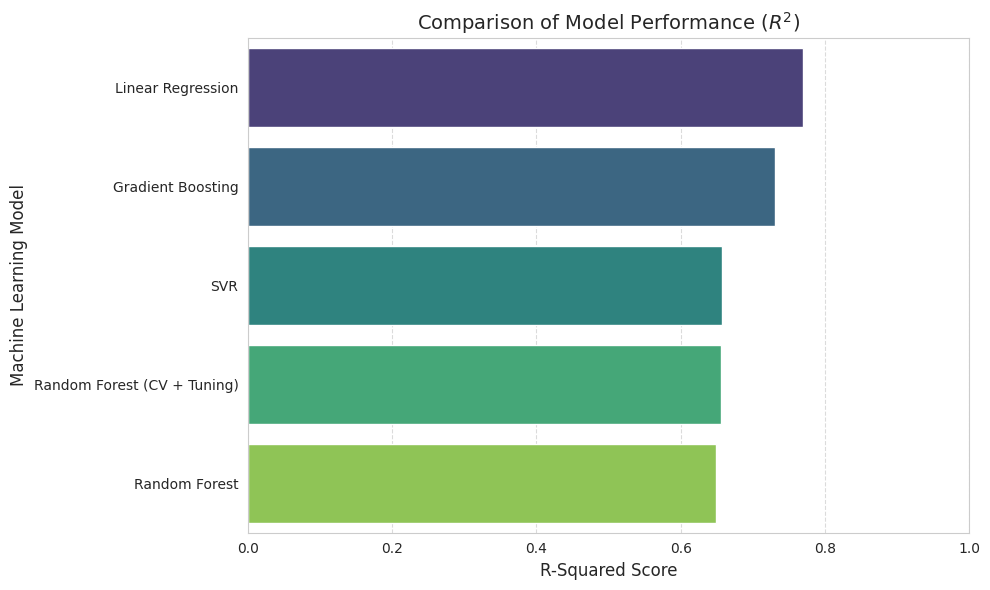

In [56]:
plt.figure(figsize=(10, 6))

# Using a horizontal bar chart for better readability of model names
sns.barplot(x='R2', y='Model', data=results.sort_values('R2', ascending=False), hue='Model', legend=False, palette='viridis')

plt.title('Comparison of Model Performance ($R^2$)', fontsize=14)
plt.xlabel('R-Squared Score', fontsize=12)
plt.ylabel('Machine Learning Model', fontsize=12)
plt.xlim(0, 1.0) # R2 ranges from 0 to 1
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 11. Results

The table reports the predictive performance of different machine learning models.
Model performance is evaluated using RMSE and R² on the test set.

Linear Regression achieves the lowest RMSE (1.80) and the highest R² (0.77), indicating strong predictive performance.
This suggests that the relationship between the predictors and exam scores is largely linear in this dataset.

Random Forest and SVR models do not outperform the linear baseline.
Although these models are more flexible, their performance is slightly weaker, possibly due to limited sample size or relatively simple underlying patterns.

After hyperparameter tuning, Random Forest performance shows only marginal changes, indicating that the baseline model was already near optimal.
Gradient Boosting improves upon Random Forest but still does not exceed Linear Regression.

Overall, the results suggest that increased model complexity does not necessarily lead to better predictive performance for this dataset.


### Actual vs. Predicted Plot

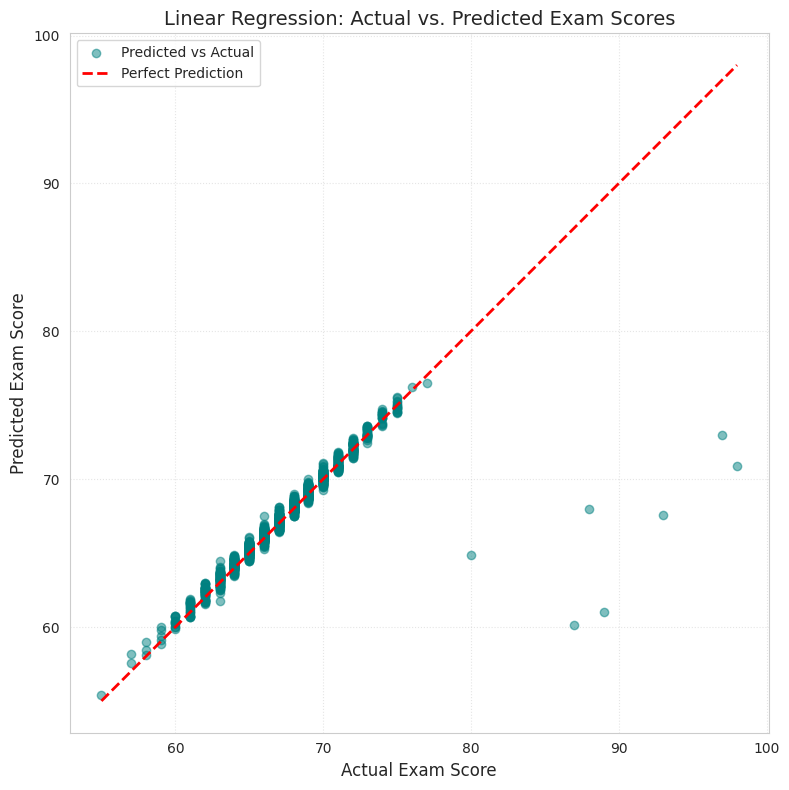

In [48]:
# Assuming y_test and y_pred_lr are already defined in your notebook
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='teal', label='Predicted vs Actual')

# 45-degree line for Perfect Prediction
max_val = max(max(y_test), max(y_pred_lr))
min_val = min(min(y_test), min(y_pred_lr))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2, label='Perfect Prediction')

plt.title('Linear Regression: Actual vs. Predicted Exam Scores', fontsize=14)
plt.xlabel('Actual Exam Score', fontsize=12)
plt.ylabel('Predicted Exam Score', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

This figure plots predicted exam scores against actual exam scores on the test set.Most observations lie close to the 45-degree line, indicating strong predictive accuracy.

A small number of high-score observations are underestimated by the model.This reflects a typical regression-to-the-mean effect and the limited number of extreme observations in the dataset.

Overall, the model performs well across the main range of the data, with larger
errors mainly occurring at the upper tail of the score distribution.



## Feature Importance

To support the second objective of this project, we analyze feature importance to better understand which student-related factors are most strongly associated with exam scores.

Feature importance is computed using tree-based models, which implicitly evaluate the contribution of each feature to prediction accuracy.
This analysis is used for interpretative purposes only, and all features are retained to preserve predictive performance.


In [51]:
import pandas as pd
import matplotlib.pyplot as plt

rf_importance = pd.Series(
    best_rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

rf_importance.head(10)


,0
Attendance,0.407375
Hours_Studied,0.259218
Previous_Scores,0.092447
Tutoring_Sessions,0.036634
Physical_Activity,0.024868
Sleep_Hours,0.022642
Parental_Involvement_Low,0.019545
Access_to_Resources_Low,0.018029
Learning_Disabilities_Yes,0.009547
Parental_Education_Level_Postgraduate,0.009255



**Interpretation (Random Forest):**  
The feature importance analysis based on the Random Forest model indicates that variables related to students’ study habits and academic engagement (such as attendance and hours studied) are the most influential predictors of exam performance.In contrast, demographic and background-related variables exhibit relatively lower importance.

These results suggest that behavioral factors are more strongly associated with exam outcomes in this dataset, although the analysis is intended for interpretative purposes rather than causal inference.These findings are consistent with earlier EDA results and help explain why linear models perform competitively in this task.


In [52]:
gb_importance = pd.Series(
    gbr.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

gb_importance.head(10)


,0
Attendance,0.466165
Hours_Studied,0.284130
Previous_Scores,0.049687
Tutoring_Sessions,0.037180
Access_to_Resources_Low,0.026943
Parental_Involvement_Low,0.022770
Parental_Involvement_Medium,0.015176
Access_to_Resources_Medium,0.014519
Peer_Influence_Positive,0.010061
Family_Income_Low,0.009566



**Interpretation (Gradient Boosting):**  
Feature importance results from Gradient Boosting are broadly consistent with those from Random Forest, reinforcing the conclusion that study-related factors are the most important predictors. This consistency increases confidence in the robustness of the findings.


# 12. Conclusion

This project investigates student exam performance from both predictive and interpretative perspectives.

First, multiple machine learning models are compared in terms of their out-of-sample predictive performance.
Among all evaluated models, Linear Regression achieves the best results, indicating that the relationship between the observed student factors and exam scores is largely linear in this dataset.
More complex models, including ensemble methods, do not provide significant performance improvements, highlighting the importance of matching model complexity to data characteristics.

Second, feature importance analysis based on tree-based models is conducted to better understand which student-related factors are most strongly associated with exam performance.
The results suggest that variables related to study habits and academic engagement play a dominant role, while demographic factors tend to be
less influential.
Feature importance is used solely for interpretation, and no causal claims are made.

Overall, the findings demonstrate that simple models can outperform complex alternatives when the underlying data structure is relatively simple, and that machine learning models can provide useful insights into important predictors without sacrificing predictive accuracy.

